# 1.7 Network Graph visualization

### This script contains the following:
1. Importing libraries and data
2. Creating a network object & static graph with NetworkX
3. Creating an interactive network graph using pyvis
4. Detecting communities within the countries with Leiden algorithm & visualizing results
5. Visualizing the degree, closeness, and betweenness centrality measures

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
import seaborn as sns
import pyvis

In [2]:
# Importing country relationships file

relationship_df = pd.read_csv('country_relationships.csv', index_col=0)

In [3]:
relationship_df

,source,target
0,France,Germany
1,Germany,Russia
2,France,Germany
3,Germany,Russia
4,Germany,Russia
...,...,...
1752,India,Singapore
1753,India,Singapore
1754,India,Singapore
1755,India,Singapore


For visualization to work we need collapse all duplicates in (source, target) pairs into a single row, with a third column showing how many times that pair appeared in the CSV, and also drop any pairs that don’t occur at least once.

In [4]:
# Strip whitespace
relationship_df['source'] = relationship_df['source'].str.strip()
relationship_df['target'] = relationship_df['target'].str.strip()

# Normalize pairs by sorting country names alphabetically (case-sensitive)
relationship_df['country1'] = relationship_df[['source', 'target']].min(axis=1)
relationship_df['country2'] = relationship_df[['source', 'target']].max(axis=1)

# Group and count unique undirected edges
df_agg = (
    relationship_df
    .groupby(['country1', 'country2'])
    .size()
    .reset_index(name='value')
)

# Remove self-relationships
df_agg = df_agg[df_agg['country1'] != df_agg['country2']]

# Sort descending by value (number of interactions)
df_agg = df_agg.sort_values(by='value', ascending=False).reset_index(drop=True)

# Save the aggregated data
df_agg.to_csv("aggregated_country_relations.csv", index=False)

print(df_agg.head(20))
print(df_agg.tail(20))

   country1                  country2  value
0     Japan  United States of America    147
1   Germany            United Kingdom     74
2   Germany                    Russia     72
3     China                     Japan     70
4    Russia  United States of America     59
5   Germany  United States of America     55
6   Germany                     Japan     47
7   Germany                     Italy     40
8    France            United Kingdom     39
9     Japan                    Russia     37
10   France                   Germany     32
11  Germany                    Poland     29
12   France                     Italy     23
13     Cuba                    Russia     22
14    India                  Pakistan     18
15  Finland                    Russia     17
16    Egypt            United Kingdom     17
17    Italy            United Kingdom     17
18  Belgium                   Germany     17
19   Poland                    Russia     16
          country1                  country2  value
95 

#### 2. Creating a network object & static graph with NetworkX

In [5]:
# Create a graph from a pandas dataframe

G = nx.from_pandas_edgelist(df_agg, 
                            source = "country1", 
                            target = "country2", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

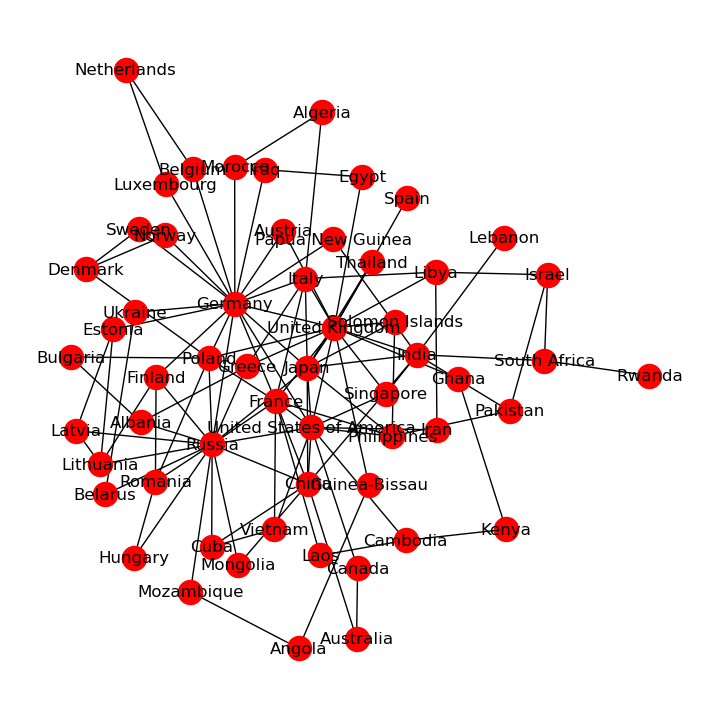

In [6]:
h = plt.figure(figsize = (7,7))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos = pos)
plt.show()

In [7]:
h.savefig('networkx_plt_countries_20_century_static.png')

#### 3. Creating interactive network graph with pyvis

In [8]:
# Define net object

net = Network()
net = Network(notebook = True,width="900px", height="800px", bgcolor='#222222', font_color='white')

# Define nodes from the G object
node_degree = dict(G.degree)

# Setting up node size attributes
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_ = True)
net.repulsion()
net.show("20th_century_country_relationships.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


#### 4. Detecting communities within the countries with Leiden algorithm & visualizing results

In [9]:
from cdlib import algorithms
coms = algorithms.leiden(G)

Note: to be able to use all crisp methods, you need to install some additional packages:  {'graph_tool', 'wurlitzer', 'infomap', 'bayanpy'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'pyclustering', 'ASLPAw'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'wurlitzer', 'infomap'}


In [10]:
type(coms)

cdlib.classes.node_clustering.NodeClustering

In [11]:
new_com = coms.to_node_community_map()

In [12]:
new_com

defaultdict(list,
            {'Japan': [0],
             'United Kingdom': [0],
             'India': [0],
             'Pakistan': [0],
             'Israel': [0],
             'South Africa': [0],
             'Solomon Islands': [0],
             'Philippines': [0],
             'Thailand': [0],
             'Singapore': [0],
             'Rwanda': [0],
             'Spain': [0],
             'Lebanon': [0],
             'Germany': [1],
             'Poland': [1],
             'Egypt': [1],
             'Belgium': [1],
             'Denmark': [1],
             'Norway': [1],
             'Austria': [1],
             'Netherlands': [1],
             'Ukraine': [1],
             'Luxembourg': [1],
             'Sweden': [1],
             'Iraq': [1],
             'Papua New Guinea': [1],
             'Russia': [2],
             'Finland': [2],
             'Estonia': [2],
             'Latvia': [2],
             'Albania': [2],
             'Greece': [2],
             'Romania': [2],


In [13]:
# Put the output from new_com into a dictionary

dict_com = {k:v[0] for k,v in new_com.items()}

In [14]:
dict_com

{'Japan': 0,
 'United Kingdom': 0,
 'India': 0,
 'Pakistan': 0,
 'Israel': 0,
 'South Africa': 0,
 'Solomon Islands': 0,
 'Philippines': 0,
 'Thailand': 0,
 'Singapore': 0,
 'Rwanda': 0,
 'Spain': 0,
 'Lebanon': 0,
 'Germany': 1,
 'Poland': 1,
 'Egypt': 1,
 'Belgium': 1,
 'Denmark': 1,
 'Norway': 1,
 'Austria': 1,
 'Netherlands': 1,
 'Ukraine': 1,
 'Luxembourg': 1,
 'Sweden': 1,
 'Iraq': 1,
 'Papua New Guinea': 1,
 'Russia': 2,
 'Finland': 2,
 'Estonia': 2,
 'Latvia': 2,
 'Albania': 2,
 'Greece': 2,
 'Romania': 2,
 'Lithuania': 2,
 'Belarus': 2,
 'Hungary': 2,
 'Bulgaria': 2,
 'Mongolia': 2,
 'United States of America': 3,
 'China': 3,
 'France': 3,
 'Cuba': 3,
 'Cambodia': 3,
 'Vietnam': 3,
 'Laos': 3,
 'Kenya': 3,
 'Australia': 3,
 'Canada': 3,
 'Ghana': 3,
 'Italy': 4,
 'Libya': 4,
 'Iran': 4,
 'Algeria': 4,
 'Morocco': 4,
 'Angola': 5,
 'Mozambique': 5,
 'Guinea-Bissau': 5}

In [15]:
# Rerun network graph with the communities as an argument

nx.set_node_attributes(G, dict_com, 'group')
com_net = Network(notebook = True, width="1300px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_ = True)
com_net.repulsion()
com_net.show("20th_century_country_communities_leiden.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


The Leiden algorithm has divided the network of country relations into 5 clusters. Some groupings align partially with historical patterns, while others mix countries from different political contexts:

**Blue cluster**: Largely composed of Western-aligned powers (e.g., UK, Japan), resembling a Cold War NATO/Western bloc structure.

**Green cluster**: Strongly reminiscent of the Eastern Bloc, including Russia, Baltic states, Bulgaria, and Poland.

**Red cluster**: Contains WWII Axis powers like Germany and Italy, but also smaller European countries such as Norway, Denmark, and Luxembourg, suggesting connections in the dataset beyond wartime alliances.

**Violet cluster**: A geographically diverse set including South Africa, Pakistan, Iran, and India, which do not neatly fit into a single World War or Cold War alignment — possibly reflecting regional conflicts or Non-Aligned Movement links.

**Yellow cluster**: A mix of major global players (US, China, France) and smaller states (Canada, Australia, Kenya), perhaps reflecting their frequent involvement in international events across multiple contexts.

#### 5. Visualizing the degree, closeness, and betweenness centrality measures

In [16]:
# Degree centrality

degree_dict = nx.degree_centrality(G)
degree_dict

{'Japan': 0.17857142857142855,
 'United States of America': 0.21428571428571427,
 'Germany': 0.3214285714285714,
 'United Kingdom': 0.30357142857142855,
 'Russia': 0.30357142857142855,
 'China': 0.14285714285714285,
 'Italy': 0.125,
 'France': 0.17857142857142855,
 'Poland': 0.125,
 'Cuba': 0.05357142857142857,
 'India': 0.14285714285714285,
 'Pakistan': 0.05357142857142857,
 'Finland': 0.07142857142857142,
 'Egypt': 0.03571428571428571,
 'Belgium': 0.03571428571428571,
 'Israel': 0.05357142857142857,
 'South Africa': 0.05357142857142857,
 'Estonia': 0.05357142857142857,
 'Latvia': 0.05357142857142857,
 'Solomon Islands': 0.05357142857142857,
 'Libya': 0.07142857142857142,
 'Albania': 0.05357142857142857,
 'Greece': 0.07142857142857142,
 'Denmark': 0.05357142857142857,
 'Norway': 0.03571428571428571,
 'Romania': 0.07142857142857142,
 'Cambodia': 0.05357142857142857,
 'Austria': 0.03571428571428571,
 'Vietnam': 0.05357142857142857,
 'Lithuania': 0.07142857142857142,
 'Laos': 0.035714285

In [17]:
degree_df = pd.DataFrame(degree_dict.items(), columns=['characters','centrality'])

In [18]:
degree_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

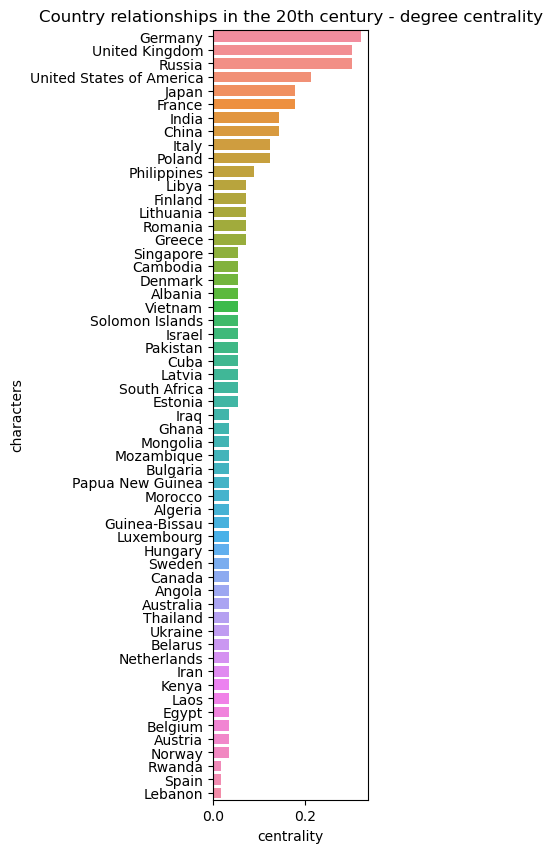

In [19]:
# Plot the degree centrality

plt.figure(figsize = (2, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "characters",
    saturation = 0.9, data = degree_df).set_title("Country relationships in the 20th century - degree centrality")

Germany, UK, and Russia lead, followed by the US, Japan, and France. This fits the idea that the article frames 20th-century history mainly through the lens of the two World Wars and the Cold War — with Germany and Russia/Soviet Union as recurring antagonists. The UK’s high degree centrality reflects its global presence during the decline of empire. The US ranking just below the top three may reflect the article’s heavier focus on earlier 20th-century events before US global dominance peaked.

In [20]:
# Closeness centrality

closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame(closeness_dict.items(), columns=['characters','centrality'])

In [21]:
closeness_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

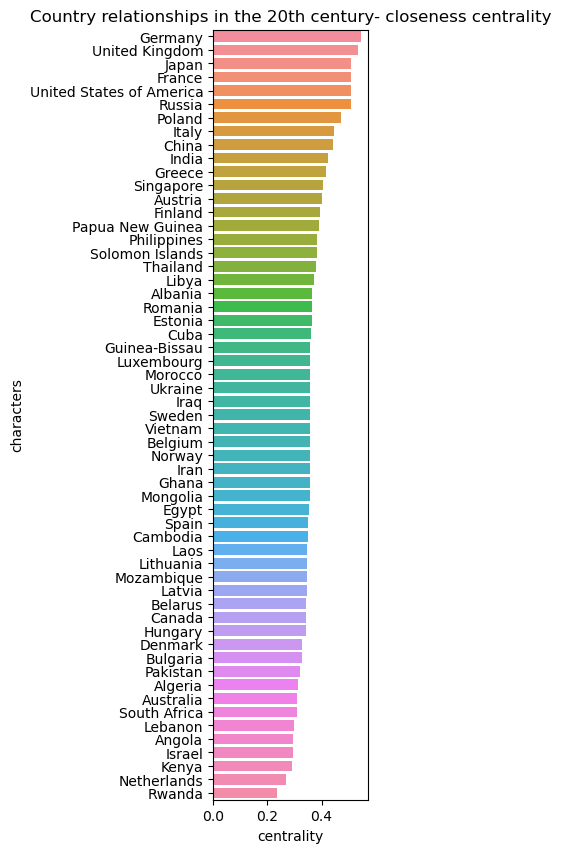

In [22]:
plt.figure(figsize = (2, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "characters",
    saturation = 0.9, data = closeness_df).set_title("Country relationships in the 20th century- closeness centrality")

Germany, UK, and Japan top the list, followed by France, the US, and Russia. The values are more even across major powers, suggesting a tightly interconnected historical narrative. In cases like Spain — which moved from second-to-last in degree centrality to the upper end of the bottom third in closeness centrality — this suggests that its connections span the network more efficiently despite having fewer total links.

In [23]:
# Betweenness centrality

betweenness_dict = nx.betweenness_centrality(G)
betweennes_df = pd.DataFrame(betweenness_dict.items(), columns=['characters','centrality'])

In [24]:
betweennes_df.sort_values(by = ['centrality'], ascending=False, inplace = True)

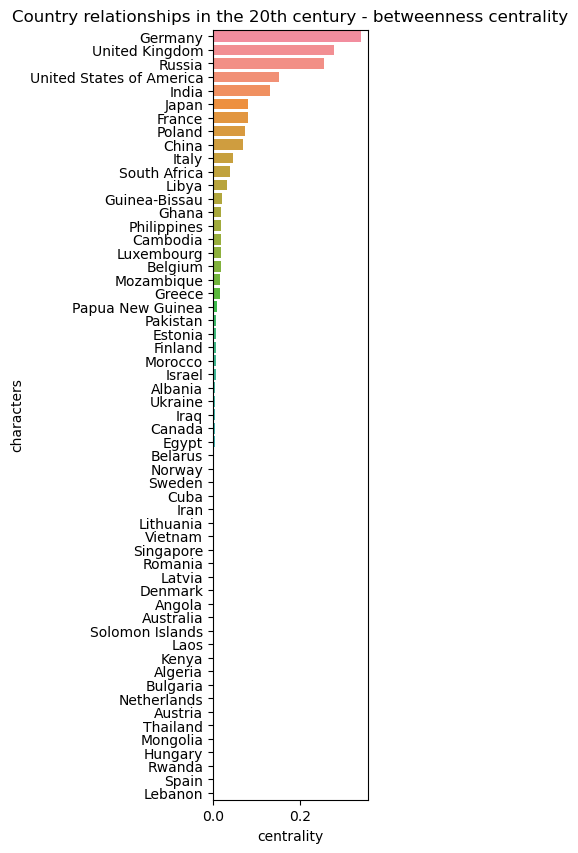

In [25]:
plt.figure(figsize = (2, 10))
with sns.dark_palette("xkcd:blue", 22):
    sns.barplot(x = "centrality", y = "characters",
    saturation = 0.9, data = betweennes_df).set_title("Country relationships in the 20th century - betweenness centrality")

Germany, UK, and Russia remain the top three, but the US, India, and Japan follow. India’s high ranking suggests its role as an intermediary in multiple regional or colonial contexts in the dataset, even if it had fewer direct connections overall.

In [26]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')